In [20]:
import os
import warnings  # to filter warnings which is quite annoying to look at.
# To perform various mathematical operations and tools to operate on nd arrays
import numpy as np
import pandas as pd  # To import and analyze data
import matplotlib.pyplot as plt  # for visualisation
import seaborn as sns  # for visualisation
import pickle  # To save data or python objects from primary memory to disk and store it in a binary format vice versa
# Natural language processing toolkit used for vectorisation and preprocesssing data.
import nltk
%matplotlib inline
# Output of plotting commands to be displayed inline in the jupyter notebook.
warnings.filterwarnings('ignore')


In [21]:
dataset = pd.read_csv("cropsss.csv")
dataset = dataset[1:]

In [22]:
dataset.head(15)

,N,P,K,Zn,Fe,Cu,Mn,Bo,pH,Ec,Oc,Crop
1,2.0,0.32,1.10,25.0,100,10.0,50,20.0,6.40,6.2,25,1
2,2.0,0.30,1.15,25.0,100,10.0,52,20.0,6.40,6.0,25,1
3,2.0,0.30,1.10,25.0,100,10.0,50,22.0,6.35,6.0,25,1
4,2.0,0.30,1.10,25.0,108,11.0,50,21.0,6.40,6.0,25,1
5,2.0,0.30,1.10,25.0,100,10.0,58,20.0,6.40,6.0,25,1
6,2.0,0.30,1.10,25.0,111,10.0,55,20.0,6.40,6.0,25,1
7,2.0,0.30,1.10,28.0,100,10.0,50,20.0,6.44,6.0,25,1
8,2.0,0.30,1.20,25.0,100,10.0,50,26.0,6.40,6.0,25,1
9,2.0,0.30,1.10,25.0,100,10.0,50,20.0,6.40,6.0,25,1
10,2.0,0.30,1.10,25.0,105,10.0,65,20.0,6.40,6.5,25,1


In [23]:
## Seperating the attributes and class label


X=dataset.drop(["Crop"],axis=1)
y=dataset["Crop"]


In [24]:
dataset.dtypes

N       float64
P       float64
K       float64
Zn      float64
Fe        int64
Cu      float64
Mn        int64
Bo      float64
pH      float64
Ec      float64
Oc        int64
Crop      int64
dtype: object

In [25]:
y.value_counts()

5     19
4     17
6     13
3     13
11    12
10    12
7     12
2     12
1     12
9     11
8     11
Name: Crop, dtype: int64

In [26]:
## Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle="False") 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(115, 11)
(115,)
(29, 11)
(29,)


In [27]:
### Random Forests classifier



from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

a=accuracy_score(y_test, pred)
print(a)

x = [[2.9,0.35,2.8,47,250,15.1,301,55.5,7,6.55,54]]
y=classifier.predict(x)
print(y)

1.0
[8]


In [28]:
### Calculating accuracy


from sklearn.metrics import accuracy_score

a=accuracy_score(y_test, pred)
print(a)


1.0


Train confusion matrix
Test confusion matrix


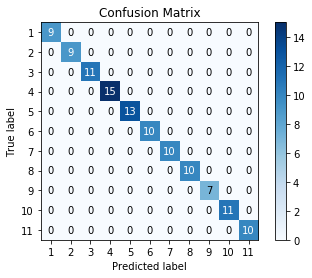

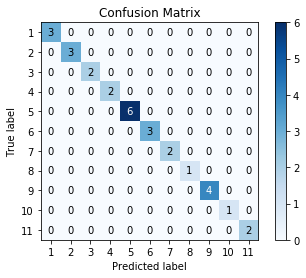

In [29]:
import scikitplot as splot
print("Train confusion matrix")
splot.metrics.plot_confusion_matrix(y_train, classifier.predict(X_train))

print("Test confusion matrix")
splot.metrics.plot_confusion_matrix(y_test, classifier.predict(X_test))

In [30]:
## Predicting classes for discrete instances
x = [[2.9,0.35,2.8,47,250,15.1,301,55.5,7,6.55,54]]
y=classifier.predict(x)
print(y)

[8]


In [31]:
## Predicting classes for discrete instances
x = [[2,0.35,1,47,250,15.1,55,125,6.5,6.5,25]]
y=classifier.predict(x)
print(y)

[9]


In [32]:
## Predicting classes for discrete instances
x = [[4,0.35,1.5,47,245,15.1,55,125,6.5,5,36]]
y=classifier.predict(x)
print(y)

[7]


In [33]:
## Predicting classes for discrete instances
x = [[5,0.35,1.5,47,245,15.1,55,125,6.5,5,50]]
y=classifier.predict(x)
print(y)

[7]


In [34]:
pickle.dump(classifier, open('crop.pkl','wb'))


In [35]:


### Decision Trees doesnt provide good results

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
from sklearn.metrics import accuracy_score

a=accuracy_score(y_test, dtree_predictions)
print(a)
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

0.344827586207
